Coordenadas dos picos encontrados: [(82, 37), (60, 63)]


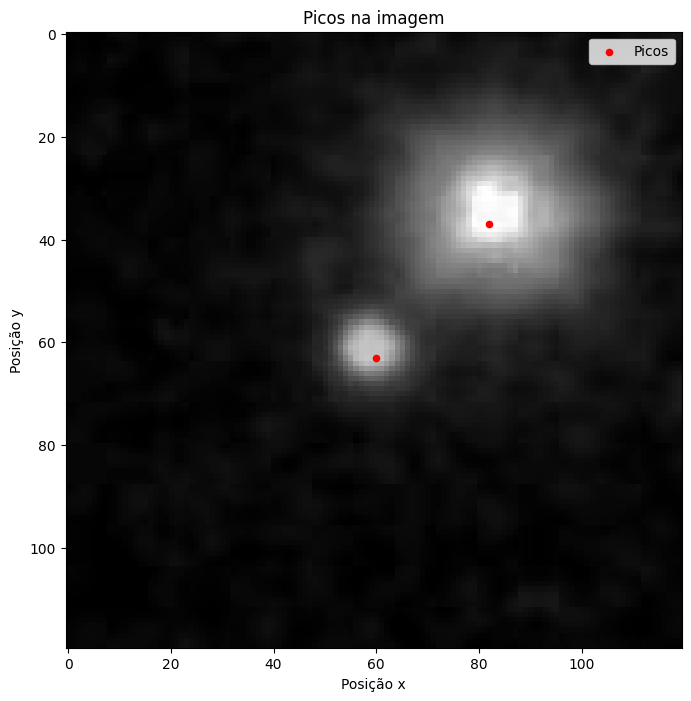

In [ ]:
import cv2
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Carregar a imagem
img_path = r"..\data\skyserver\dr18\120_0.2\sdss_image_180.316210953946_0.234630238900774.jpg"  # Especifique o caminho da imagem
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza

# Obter a intensidade ao longo das dimensões x e y
intensity = np.array(image)

# Encontrar o valor máximo por linha (eixo y) e por coluna (eixo x)
max_by_x = intensity.max(axis=0)  # Máximo ao longo da dimensão y (colunas)
max_by_y = intensity.max(axis=1)  # Máximo ao longo da dimensão x (linhas)

# Obter os valores de x e y
x_values = np.arange(intensity.shape[1])
y_values = np.arange(intensity.shape[0])

# Definir parâmetros para detecção de picos
prominence_x = 0.15 * max(max_by_x)  # Proeminência de 15% do valor máximo em x
prominence_y = 0.15 * max(max_by_y)  # Proeminência de 15% do valor máximo em y
distance_x = 10  # Distância mínima entre picos em x (ajuste conforme necessário)
distance_y = 10  # Distância mínima entre picos em y (ajuste conforme necessário)

# Encontrar picos para a curva de intensidade por x e y com distância mínima
peaks_x, _ = find_peaks(max_by_x, prominence=prominence_x, height=0.55 * max(max_by_x), distance=distance_x)
peaks_y, _ = find_peaks(max_by_y, prominence=prominence_y, height=0.55 * max(max_by_y), distance=distance_y)

# Encontrar os pares de coordenadas onde há picos nos dois eixos
# Percorrer o mapa de intensidade para verificar onde os picos de x e y coincidem
peak_coords = [(x, y) for y in peaks_y for x in peaks_x if intensity[y, x] >= 0.55 * intensity.max()]

# Exibir os resultados
print("Coordenadas dos picos encontrados:", peak_coords)

# Plotar a imagem e os picos
plt.figure(figsize=(8, 8))
plt.imshow(intensity, cmap='gray')
x_peaks = [point[0] for point in peak_coords]
y_peaks = [point[1] for point in peak_coords]
plt.scatter(x_peaks, y_peaks, color='red', marker='o', s=20, label='Picos')
plt.title("Picos na imagem")
plt.xlabel("Posição x")
plt.ylabel("Posição y")
plt.legend()
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from scipy.signal import find_peaks
import json

def find_peaks_in_image(image, prominence_factor=0.15, height_factor=0.050, distance_x=10, distance_y=10):
    # Obter a intensidade ao longo das dimensões x e y
    intensity = np.array(image)

    # Encontrar o valor máximo por linha (eixo y) e por coluna (eixo x)
    max_by_x = intensity.max(axis=0)  # Máximo ao longo da dimensão y (colunas)
    max_by_y = intensity.max(axis=1)  # Máximo ao longo da dimensão x (linhas)

    # Definir proeminência e altura mínima para detecção de picos
    prominence_x = prominence_factor * max(max_by_x)
    prominence_y = prominence_factor * max(max_by_y)
    height_x = height_factor * max(max_by_x)
    height_y = height_factor * max(max_by_y)

    # Encontrar picos com proeminência e distância mínima
    peaks_x, _ = find_peaks(max_by_x, prominence=prominence_x, height=height_x, distance=distance_x)
    peaks_y, _ = find_peaks(max_by_y, prominence=prominence_y, height=height_y, distance=distance_y)

    # Obter coordenadas onde há picos nos dois eixos, convertendo para `int`
    peak_coords = [(int(x), int(y)) for y in peaks_y for x in peaks_x if intensity[y, x] >= height_factor * intensity.max()]

    return peak_coords

def process_images_in_folder(folder_path, output_json_path, prominence_factor=0.15, height_factor=0.050, distance_x=10, distance_y=10):
    all_images_data = []  # Lista para armazenar os dados de cada imagem

    # Percorre todos os arquivos no diretório
    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg",,, ".jpeg", ".bmp", ".tiff")):  # Suporta diferentes formatos de imagem
            image_path = os.path.join(folder_path, filename)
            image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza

            # Encontra os picos na imagem com a configuração de distância mínima e proeminência
            peak_coordinates = find_peaks_in_image(
                image_data, 
                prominence_factor=prominence_factor, 
                height_factor=height_factor, 
                distance_x=distance_x, 
                distance_y=distance_y
            )

            # Adiciona os dados da imagem atual ao JSON, convertendo os valores para int
            image_info = {
                "image_path": image_path,
                "peaks": [{"x": int(x), "y": int(y)} for x, y in peak_coordinates]
            }
            all_images_data.append(image_info)  # Adiciona cada imagem separadamente à lista

    # Salva todos os dados das imagens no arquivo JSON
    with open(output_json_path, 'w') as json_file:
        json.dump(all_images_data, json_file, indent=4)
    print(f"Dados salvos em {output_json_path}")

# Exemplo de uso
folder_path = r"..\data\skyserver\dr18\120_0.4"
output_json_path = "skyserver_dr18_120_04_dataset_label.json"  # Caminho de saída do JSON

process_images_in_folder(folder_path, output_json_path)


Dados salvos em skyserver_dr18_120_04_dataset_label.json


In [ ]:
images = [
    r"data\noise\treno_sdss_image_120.17063548933_0.358096706241307.png",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.171408773627_0.35639930317447.jpg",
    r"..\data\skyserver\dr18\200_0.2\sdss_image_180.171408773627_0.35639930317447.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.314025750627_-0.0257549129402702.jpg",
    r"..\data\skyserver\dr18\120_0.4\sdss_image_180.313186780449_0.206615990437186.jpg",
    r"..\data\skyserver\dr18\120_0.4\sdss_image_180.316130449752_-0.0240209645983516.jpg",
    r"..\data\skyserver\dr18\120_0.3\sdss_image_180.731788727317_0.268910644954916.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.316210953946_0.234630238900774.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.731788727317_0.268910644954916.jpg",
    r"..\data\skyserver\dr18\120_0.05\sdss_image_180.866545948245_0.0733494204912493.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.866302981297_-0.139722107311907.jpg",
    r"..\data\skyserver\compromised\3-types-of-blurring\blurred_average_274-51913-230.jpg",
    r"..\data\skyserver\dr18\120_0.3\sdss_image_180.866514381438_0.345166549524844.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.176482873675_0.182726662479744.jpg",
    r"..\database\archive (1)\Cutout Files\star\grb0422a_01_68_1020_6.jpg",
    r"..\database\archive (1)\Cutout Files\star\grb0422a_01_546_218_6.jpg",
    r"..\database\archive (1)\Cutout Files\star\IC745_H01_1526_1132_6.jpg",
    r"..\data\skyserver\dr18\120_0.3\sdss_image_180.176390275064_-0.047091687826631.jpg",
    r"..\data\skyserver\dr18\120_0.4\sdss_image_180.867871194172_0.341396873315708.jpg",
    r"..\data\skyserver\dr18\120_0.4\sdss_image_180.867050000237_0.314017431674984.jpg",
    r"..\data\skyserver\clean_200_0.2\sdss_image_49.2511248902923_43.8591858289443.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.451206348309_-0.324013595202261.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.452296000739_0.410663628755376.jpg",
    r"..\data\skyserver\dr18\120_0.05\sdss_image_180.867050000237_0.314017431674984.jpg",
    r"..\data\skyserver\dr18\120_0.05\sdss_image_180.59510261428_-0.491633210707007.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.176432942226_-0.496947548781713.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.176390275064_-0.047091687826631.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.178793448259_0.128864881681367.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.317778905581_0.200355535056279.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.456426757026_0.151122658317233.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.596018192016_0.254361941874142.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.178237138514_0.240879055449473.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.730653723695_-0.492076046304188.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.452311561052_0.182473354518565.jpg",
    r"..\data\skyserver\dr18\120_0.2\sdss_image_180.586669205413_0.272768111851804.jpg",
    r"..\database\archive (1)\Cutout Files\star\J1530p2310_r_01_434_1940_6.jpg",
    r"..\database\archive (1)\Cutout Files\star\J1603p3002_001_010_559_586_6.jpg",
    r"..\database\archive (1)\Cutout Files\star\j1612p5118_r_01_344_1751_6.jpg"
    r"..\database\archive (1)\Cutout Files\star\J121929p47152_001_010_503_1349_6.jpg",
    r"..\database\archive (1)\Cutout Files\star\xo-1-R001_68_392_6.jpg",
    r"..\data\skyserver\dr18\120_0.05\sdss_image_180.5947871529_-0.0472959792139866.jpg"
]

In [ ]:
import cv2
import numpy as np
from scipy.signal import find_peaks
import json

def find_peaks_in_image(image, prominence_factor=0.15, height_factor=0.050, distance_x=10, distance_y=10):
    # Obter a intensidade ao longo das dimensões x e y
    intensity = np.array(image)

    # Encontrar o valor máximo por linha (eixo y) e por coluna (eixo x)
    max_by_x = intensity.max(axis=0)  # Máximo ao longo da dimensão y (colunas)
    max_by_y = intensity.max(axis=1)  # Máximo ao longo da dimensão x (linhas)

    # Definir proeminência e altura mínima para detecção de picos
    prominence_x = prominence_factor * max(max_by_x)
    prominence_y = prominence_factor * max(max_by_y)
    height_x = height_factor * max(max_by_x)
    height_y = height_factor * max(max_by_y)

    # Encontrar picos com proeminência e distância mínima
    peaks_x, _ = find_peaks(max_by_x, prominence=prominence_x, height=height_x, distance=distance_x)
    peaks_y, _ = find_peaks(max_by_y, prominence=prominence_y, height=height_y, distance=distance_y)

    # Obter coordenadas onde há picos nos dois eixos, convertendo para `int`
    peak_coords = [(int(x), int(y)) for y in peaks_y for x in peaks_x if intensity[y, x] >= height_factor * intensity.max()]

    return peak_coords

def process_images_from_list(images, output_json_path, prominence_factor=0.15, height_factor=0.050, distance_x=10, distance_y=10):
    all_images_data = []  # Lista para armazenar os dados de cada imagem

    # Percorre todos os caminhos de imagem na lista fornecida
    for image_path in images:
        # Lê a imagem em escala de cinza
        image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image_data is None:
            print(f"Erro ao carregar a imagem: {image_path}")
            continue

        # Encontra os picos na imagem com a configuração de distância mínima e proeminência
        peak_coordinates = find_peaks_in_image(
            image_data, 
            prominence_factor=prominence_factor, 
            height_factor=height_factor, 
            distance_x=distance_x, 
            distance_y=distance_y
        )

        # Adiciona os dados da imagem atual ao JSON, convertendo os valores para int
        image_info = {
            "image_path": image_path,
            "peaks": [{"x": int(x), "y": int(y)} for x, y in peak_coordinates]
        }
        all_images_data.append(image_info)  # Adiciona cada imagem separadamente à lista

    # Salva todos os dados das imagens no arquivo JSON
    with open(output_json_path, 'w') as json_file:
        json.dump(all_images_data, json_file, indent=4)
    print(f"Dados salvos em {output_json_path}")


output_json_path = "skyserver_dr18_dataset_label.json"  # Caminho de saída do JSON

process_images_from_list(images, output_json_path)


In [2]:
import os
import numpy as np
import json
from skimage.io import imread
import matplotlib.pyplot as plt

# Função para carregar e exibir a primeira imagem com os picos
def display_first_image_with_peaks(json_path):
    # Carregar dados do JSON
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    # Selecionar a primeira imagem e seus picos
    first_image_data = data[92]
    image_path = first_image_data['image_path']
    peaks = first_image_data['peaks']

    print(image_path)
    
    # Carregar a imagem
    image = imread(image_path, as_gray=True)
    
    # Plotar a imagem e os picos
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    
    # Obter as coordenadas x e y dos picos
    x_peaks = [point['x'] for point in peaks]
    y_peaks = [point['y'] for point in peaks]
    
    # Marcar os picos na imagem
    plt.scatter(x_peaks, y_peaks, color='red', marker='o', s=20, label='Picos')
    plt.title(f"Picos na imagem: {os.path.basename(image_path)}")
    plt.xlabel('Posição x')
    plt.ylabel('Posição y')
    plt.legend()
    plt.show()

# Exemplo de uso com o caminho do JSON gerado anteriormente
# json_path = "revisado_skyserver_dr18_120_04_dataset_label.json"
json_path = "skyserver_dr18_dataset_label.json"
display_first_image_with_peaks(json_path)


IndexError: list index out of range

In [ ]:
import json
import numpy as np

# Função para carregar as coordenadas do JSON para uma imagem específica
def get_coordinates_from_json(json_path, target_image_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    # Encontrar a entrada no JSON que corresponde ao caminho da imagem alvo
    for image_data in data:
        if image_data["image_path"] == target_image_path:
            return [(peak['x'], peak['y']) for peak in image_data["peaks"]]
    
    # Retorna uma lista vazia se o caminho da imagem não for encontrado
    print(f"Imagem {target_image_path} não encontrada no JSON.")
    return []

# Função para calcular a distância entre duas coordenadas
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Função para comparar coordenadas do JSON e do modelo para uma imagem específica
def compare_coordinates(json_coords, model_coords, max_distance=5):
    matched_coords = []
    unmatched_coords = []

    # Comparação entre coordenadas JSON e modelo
    for json_coord in json_coords:
        matched = False
        for model_coord in model_coords:
            distance = calculate_distance(json_coord, model_coord)
            if distance <= max_distance:
                matched_coords.append((json_coord, model_coord))
                matched = True
                break
        if not matched:
            unmatched_coords.append(json_coord)

    return matched_coords, unmatched_coords

# Função para executar a verificação de uma imagem específica
def verify_image_coordinates(json_path, target_image_path, model_coords, max_distance=5):
    # Obter as coordenadas do JSON para a imagem alvo
    json_coords = get_coordinates_from_json(json_path, target_image_path)

    if not json_coords:
        print("Nenhuma coordenada encontrada no JSON para esta imagem.")
        return

    # Comparar coordenadas JSON e modelo
    matched, unmatched = compare_coordinates(json_coords, model_coords, max_distance=max_distance)

    print(f"Para a imagem {target_image_path}:")
    print(f" - Coordenadas correspondentes: {matched}")
    print(f" - Coordenadas não correspondentes: {unmatched}")

# Exemplo de uso
json_path = "revisado_skyserver_dr18_120_04_dataset_label.json"  # Caminho do JSON gerado anteriormente
target_image_path = r"..\data\skyserver\dr18\120_0.2\sdss_image_180.316210953946_0.234630238900774.jpg"

# Simula a saída do modelo para esta imagem específica
# Substitua pela função real que executa seu modelo para obter as coordenadas
model_coords = [(59, 62)]  # Exemplo fictício

# Executa a verificação
verify_image_coordinates(json_path, target_image_path, model_coords, max_distance=5)


In [ ]:
import json
import numpy as np

# Função para carregar dados de JSON
def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Função para calcular a distância entre duas coordenadas
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1["x"] - coord2["x"])**2 + (coord1["y"] - coord2["y"])**2)

# Função para comparar as coordenadas de dois JSONs
def compare_json_files(json1_path, json2_path, max_distance=5):
    # Carregar dados dos dois arquivos JSON
    json1_data = load_json_data(json1_path)
    json2_data = load_json_data(json2_path)

    # Converter json2_data em um dicionário para facilitar a busca pelo image_path
    json2_dict = {item["image_path"]: item["peaks"] for item in json2_data}

    # Iterar sobre cada item no primeiro JSON
    for item1 in json1_data:
        image_path = item1["image_path"]
        positions1 = item1["peaks"]

        # Procurar a mesma imagem no segundo JSON
        if image_path in json2_dict:
            positions2 = json2_dict[image_path]
            matched_coords = []
            unmatched_coords = []

            # Comparar coordenadas
            for pos1 in positions1:
                matched = False
                for pos2 in positions2:
                    distance = calculate_distance(pos1, pos2)
                    if distance <= max_distance:
                        matched_coords.append((pos1, pos2))
                        matched = True
                        break
                if not matched:
                    unmatched_coords.append(pos1)

            # Exibir resultados para a imagem atual
            print(f"Para a imagem {image_path}:")
            print(f" - Coordenadas correspondentes: {matched_coords}")
            print(f" - Coordenadas não correspondentes: {unmatched_coords}")
        else:
            print(f"Imagem {image_path} não encontrada no segundo JSON.")

# Exemplo de uso
json1_path = "revisado_skyserver_dr18_120_04_dataset_label.json"  # Primeiro JSON
json2_path = "results_kernel_param_cos_similarity.json"  # Segundo JSON
compare_json_files(json1_path, json2_path, max_distance=5)
